
# Data Visualization Training using Matplotlib and Seaborn

**Objective:**  
Learn to visualize data effectively using **Matplotlib** and **Seaborn** libraries.  
We'll use a dummy *Sales Dataset* to demonstrate different chart types, their usage, and importance.

**Dataset Overview:**  
We have a sales dataset containing product information including category, price, quantity sold, and revenue.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Create dummy sales dataset
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Headphones', 'Smartwatch', 'Camera', 'Speaker', 'Monitor'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Accessories', 'Accessories', 'Electronics', 'Accessories', 'Electronics'],
    'Price': [800, 600, 300, 100, 200, 500, 150, 250],
    'Quantity': [50, 120, 70, 200, 150, 80, 100, 60],
    'Revenue': [40000, 72000, 21000, 20000, 30000, 40000, 15000, 15000]
}
df = pd.DataFrame(data)
print("Dataset Overview:")
print(df)
print("\nDataset Info:")
df.info()


Dataset Overview:
      Product     Category  Price  Quantity  Revenue
0      Laptop  Electronics    800        50    40000
1       Phone  Electronics    600       120    72000
2      Tablet  Electronics    300        70    21000
3  Headphones  Accessories    100       200    20000
4  Smartwatch  Accessories    200       150    30000
5      Camera  Electronics    500        80    40000
6     Speaker  Accessories    150       100    15000
7     Monitor  Electronics    250        60    15000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   8 non-null      object
 1   Category  8 non-null      object
 2   Price     8 non-null      int64 
 3   Quantity  8 non-null      int64 
 4   Revenue   8 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 452.0+ bytes



## Why Visualization Matters
Data visualization helps convert raw data into meaningful visual insights.
In AI/ML and business analytics, visualizing data helps identify patterns, trends, and outliers before modeling or decision-making.

### Key Benefits:
1. **Pattern Recognition** - Spot trends and correlations
2. **Outlier Detection** - Identify anomalies in data
3. **Data Storytelling** - Communicate insights effectively
4. **Decision Support** - Make informed business decisions


## Basic Data Analysis

In [3]:

print("Basic Statistics:")
print(df.describe())

print("\nTotal Revenue by Category:")
category_revenue = df.groupby('Category')['Revenue'].sum()
print(category_revenue)

print("\nTop Selling Products by Quantity:")
top_products = df.nlargest(3, 'Quantity')[['Product', 'Quantity']]
print(top_products)


Basic Statistics:
            Price    Quantity       Revenue
count    8.000000    8.000000      8.000000
mean   362.500000  103.750000  31625.000000
std    246.040066   50.972682  19175.412083
min    100.000000   50.000000  15000.000000
25%    187.500000   67.500000  18750.000000
50%    275.000000   90.000000  25500.000000
75%    525.000000  127.500000  40000.000000
max    800.000000  200.000000  72000.000000

Total Revenue by Category:
Category
Accessories     65000
Electronics    188000
Name: Revenue, dtype: int64

Top Selling Products by Quantity:
      Product  Quantity
3  Headphones       200
4  Smartwatch       150
1       Phone       120


# Matplotlib Visualizations

Matplotlib is the foundational plotting library in Python.

## Line Plot - Showing Trends

Line plots are ideal for showing trends over time or sequential data.

C:\Users\dell\AppData\Local\Temp\ipykernel_1804\1860511056.py:7: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, alpha=0.3)


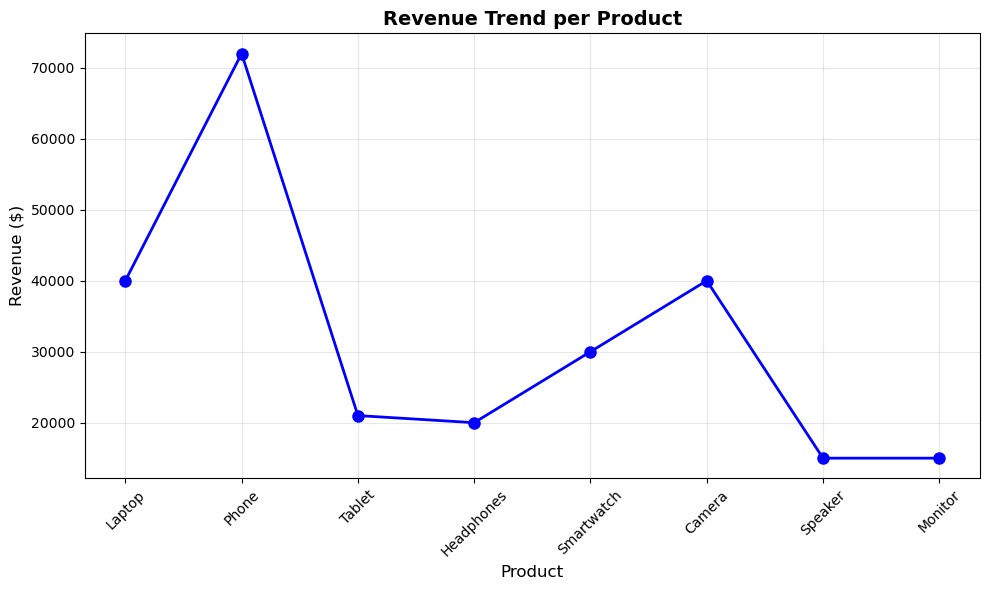

In [4]:

plt.figure(figsize=(10, 6))
plt.plot(df['Product'], df['Revenue'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title('Revenue Trend per Product', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False, alpha=0.3)
plt.tight_layout()
plt.show()


## Bar Chart - Comparing Quantities

Bar charts are excellent for comparing categorical data.

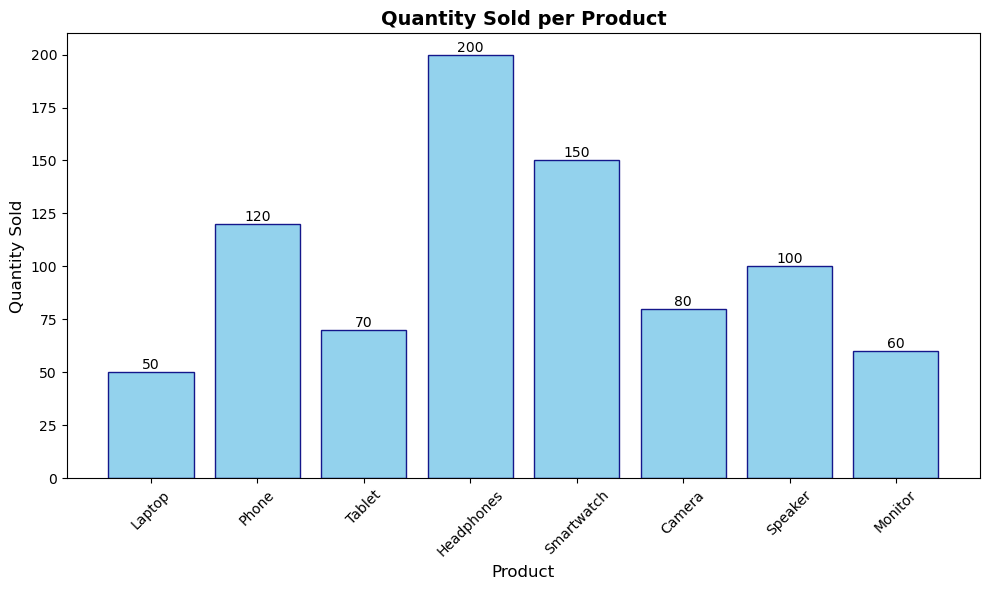

In [10]:

plt.figure(figsize=(10, 6))
bars = plt.bar(df['Product'], df['Quantity'], color='skyblue', edgecolor='navy' , alpha =  0.9)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Quantity Sold per Product', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Horizontal Bar Chart

Horizontal bars are useful when you have long category names.

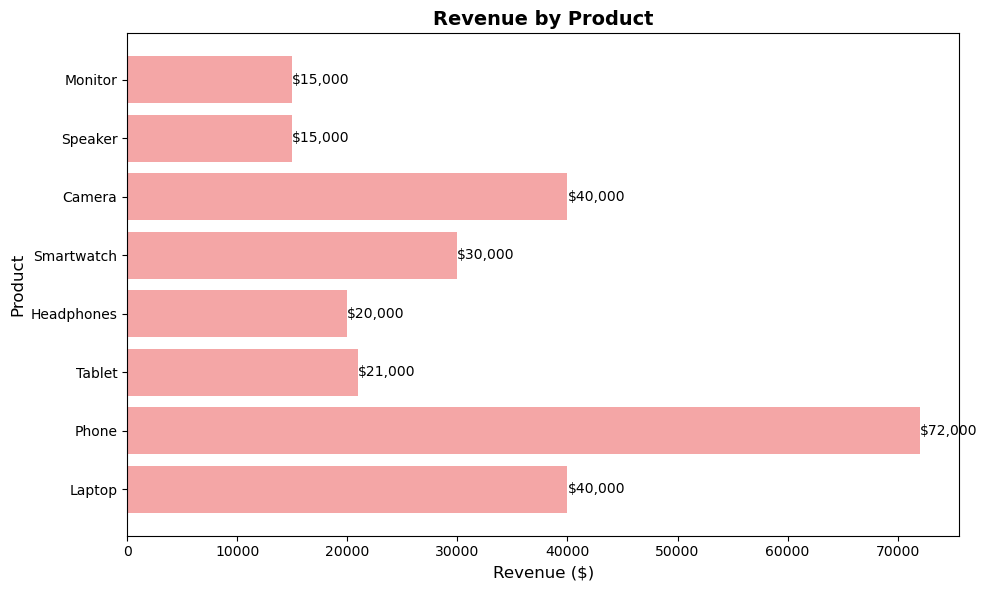

In [5]:

plt.figure(figsize=(10, 6))
bars = plt.barh(df['Product'], df['Revenue'], color='lightcoral', alpha=0.7)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2., 
             f'${width:,.0f}', ha='left', va='center')

plt.title('Revenue by Product', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()


## Histogram - Distribution of Prices

Histograms show the distribution of numerical data.

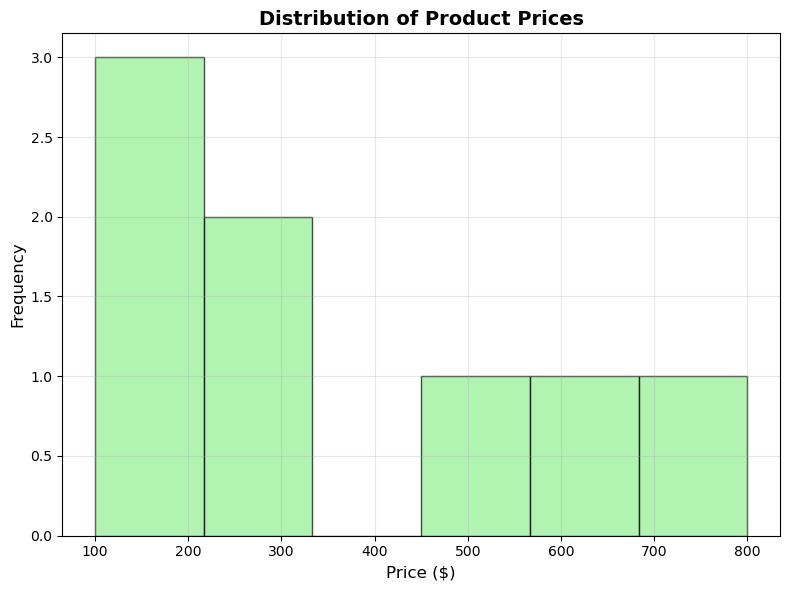

In [6]:

plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=6, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Prices', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Scatter Plot - Relationship between Price and Revenue

Scatter plots reveal relationships between two numerical variables.

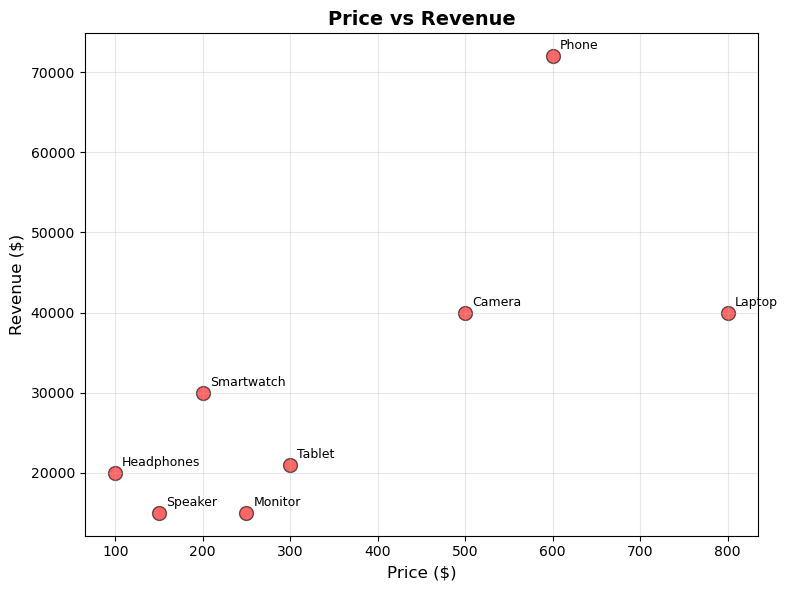

In [7]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Price'], df['Revenue'], s=100, color='red', alpha=0.6, edgecolors='black')

# Add labels for each point
for i, product in enumerate(df['Product']):
    plt.annotate(product, (df['Price'][i], df['Revenue'][i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Price vs Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Pie Chart - Sales Distribution by Category

Pie charts show proportions and percentages of categorical data.

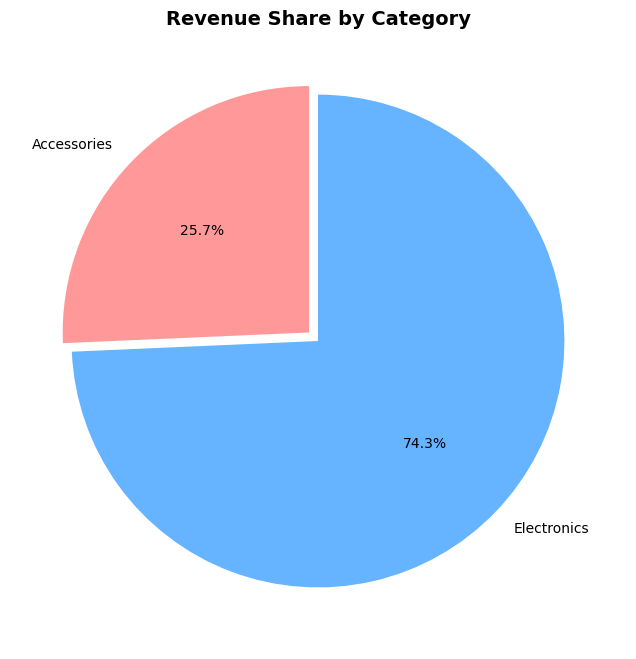

In [8]:

category_sales = df.groupby('Category')['Revenue'].sum()
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=(0.05, 0))
plt.title('Revenue Share by Category', fontsize=14, fontweight='bold')
plt.show()


## Subplots Example - Multiple Charts Together

Subplots allow you to display multiple charts in a single figure.

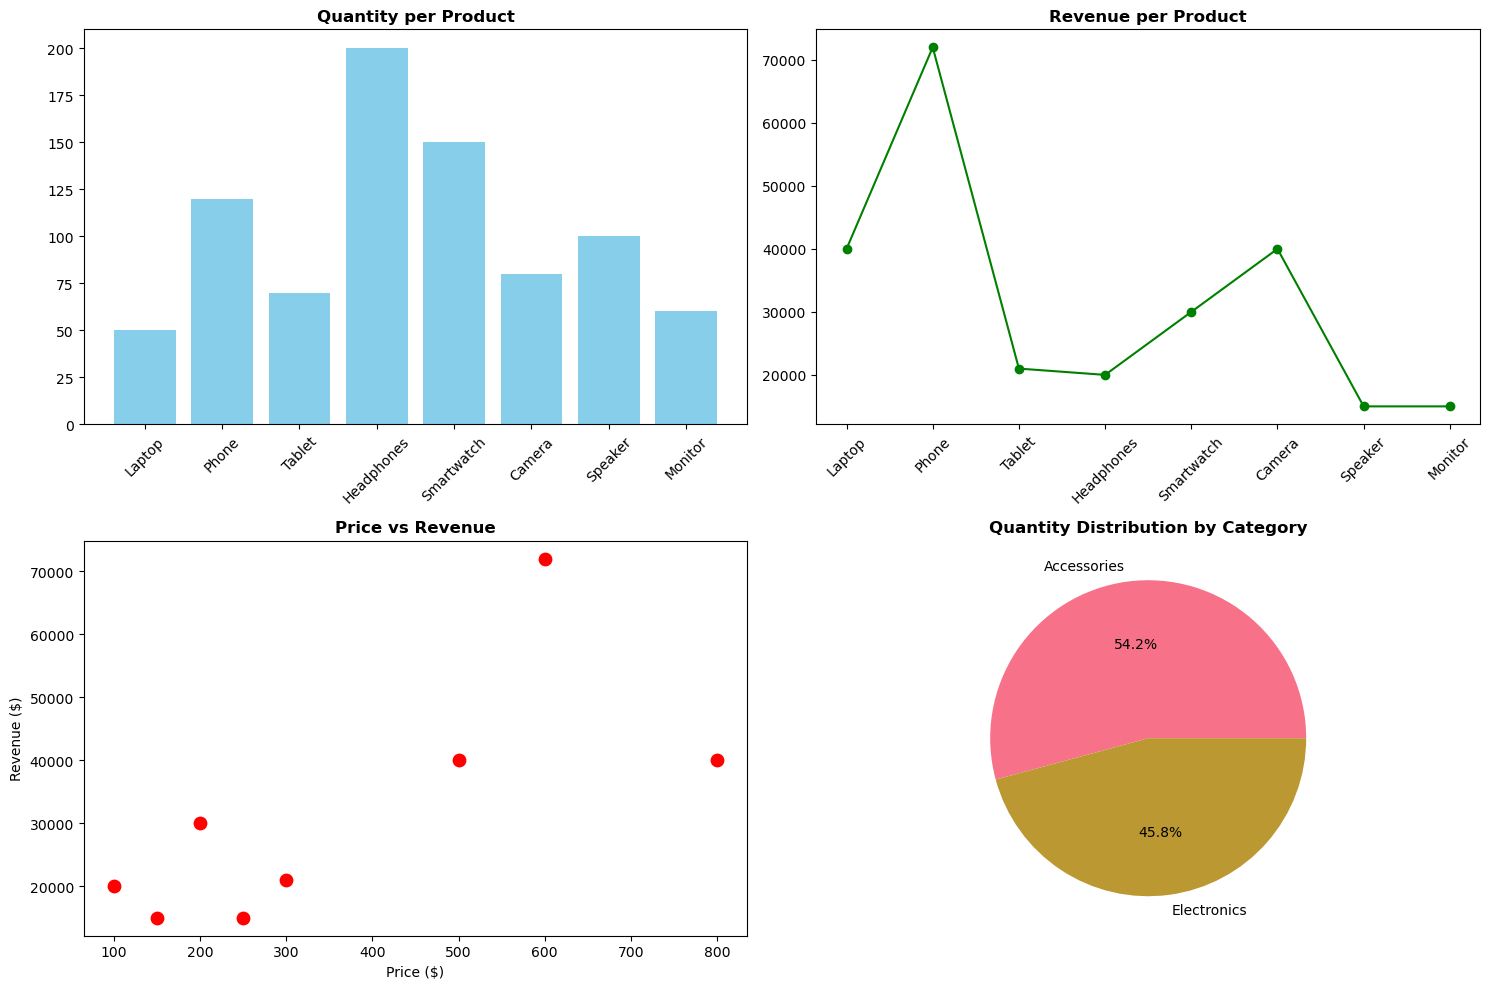

In [9]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Bar chart for quantity
axes[0, 0].bar(df['Product'], df['Quantity'], color='skyblue')
axes[0, 0].set_title('Quantity per Product', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Line chart for revenue
axes[0, 1].plot(df['Product'], df['Revenue'], marker='o', color='green')
axes[0, 1].set_title('Revenue per Product', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Scatter plot
axes[1, 0].scatter(df['Price'], df['Revenue'], color='red', s=80)
axes[1, 0].set_title('Price vs Revenue', fontweight='bold')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Revenue ($)')

# Plot 4: Pie chart for category distribution
category_quantity = df.groupby('Category')['Quantity'].sum()
axes[1, 1].pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%')
axes[1, 1].set_title('Quantity Distribution by Category', fontweight='bold')

plt.tight_layout()
plt.show()



# Seaborn Visualizations

Seaborn is built on top of Matplotlib and provides:
- Better default styles
- Built-in color palettes
- Statistical plotting functions
- Easy integration with pandas DataFrames


## Heatmap - Correlation Matrix

Heatmaps are great for visualizing correlation matrices and identifying relationships between variables.

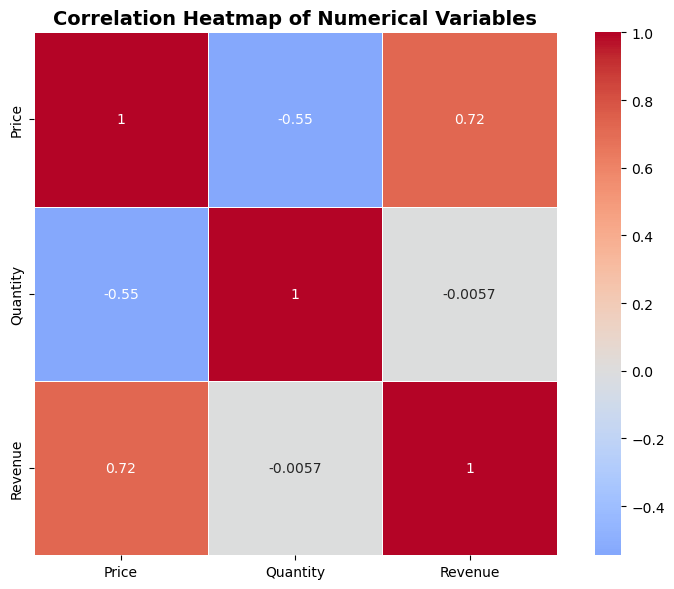

In [10]:

plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Boxplot - Price Distribution by Category

Boxplots show the distribution of data and identify outliers across categories.

C:\Users\dell\AppData\Local\Temp\ipykernel_19168\2815669754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=df, palette='Set2')


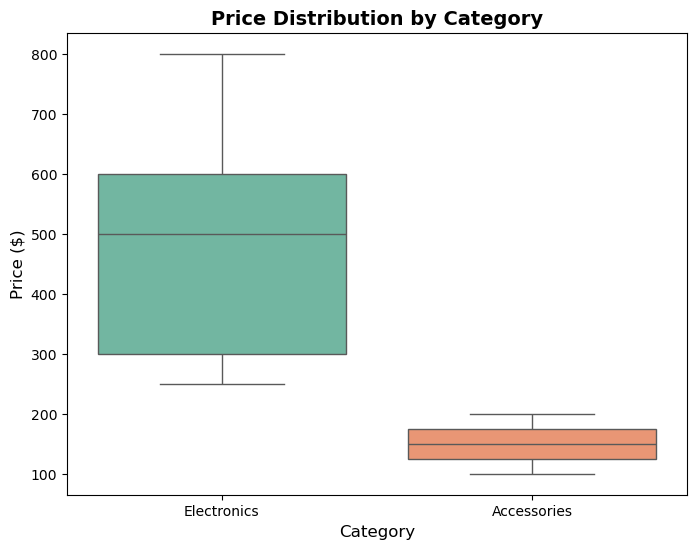

In [11]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()


## Violin Plot - Combined Boxplot and Distribution

Violin plots combine boxplots with kernel density estimation.

C:\Users\dell\AppData\Local\Temp\ipykernel_19168\2654633616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Price', data=df, palette='pastel')


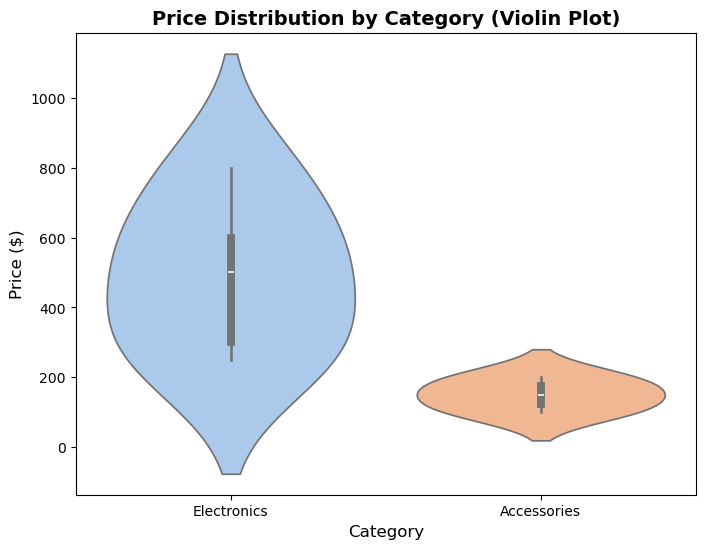

In [12]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Category', y='Price', data=df, palette='pastel')
plt.title('Price Distribution by Category (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()


## Count Plot - Categorical Data Distribution

C:\Users\dell\AppData\Local\Temp\ipykernel_19168\2028949861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


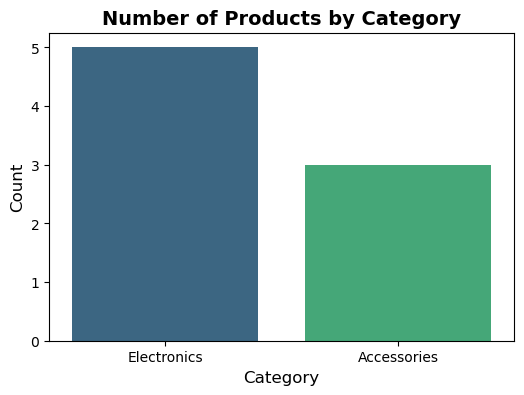

In [13]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Number of Products by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## Pairplot - Pairwise Relationships

Pairplots create a matrix of scatterplots for all numerical variables.

Pairplot showing relationships between all numerical variables:


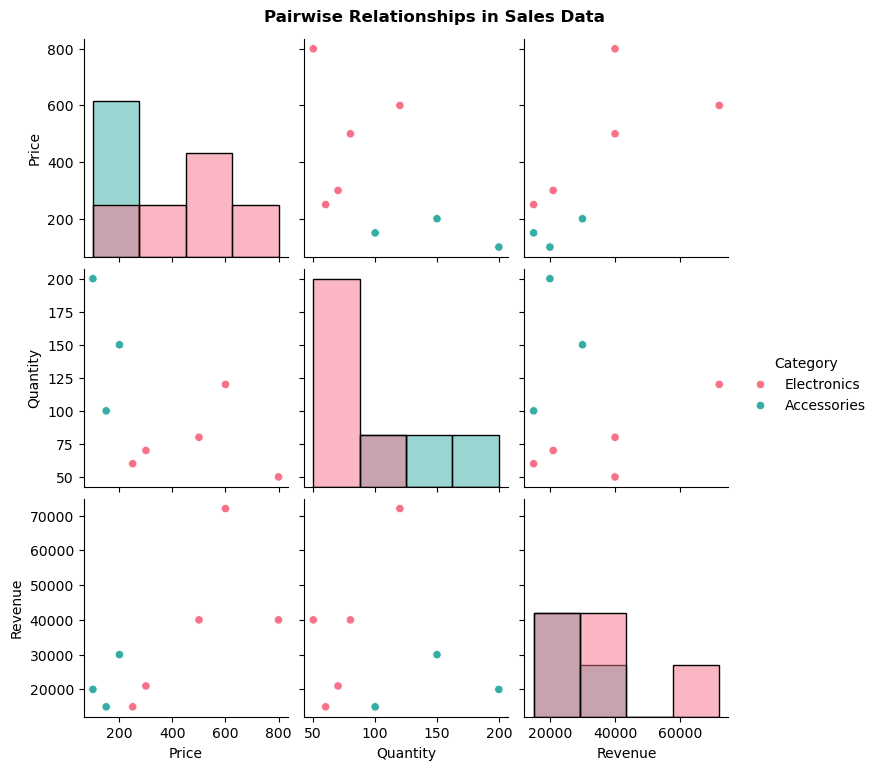

In [14]:

print("Pairplot showing relationships between all numerical variables:")
sns.pairplot(df, hue='Category', diag_kind='hist', palette='husl', height=2.5)
plt.suptitle('Pairwise Relationships in Sales Data', y=1.02, fontweight='bold')
plt.show()


## Advanced Visualization - Bubble Chart

Bubble charts can show three dimensions of data: x, y, and bubble size.

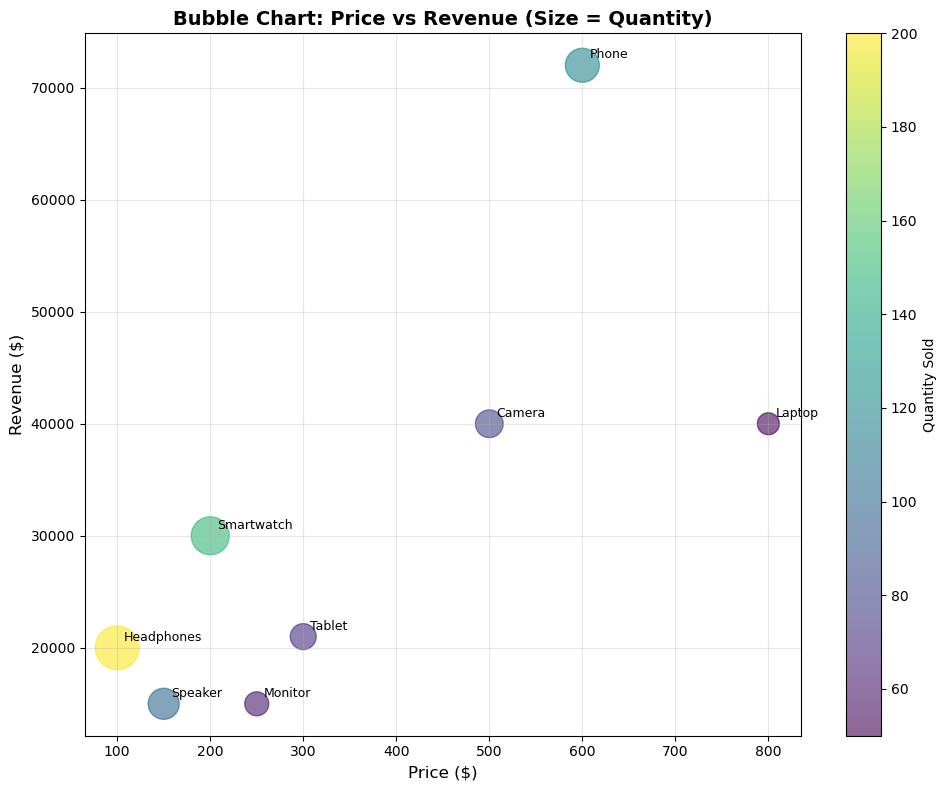

In [15]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Price'], df['Revenue'], 
                     s=df['Quantity']*5,  # Bubble size based on quantity
                     c=df['Quantity'],    # Color based on quantity
                     alpha=0.6, 
                     cmap='viridis')

# Add labels
for i, product in enumerate(df['Product']):
    plt.annotate(product, (df['Price'][i], df['Revenue'][i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.colorbar(scatter, label='Quantity Sold')
plt.title('Bubble Chart: Price vs Revenue (Size = Quantity)', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



## Data Visualization Best Practices

### 1. Choose the Right Chart Type
- **Comparisons**: Bar charts, column charts
- **Trends**: Line charts, area charts
- **Distributions**: Histograms, box plots, violin plots
- **Relationships**: Scatter plots, bubble charts
- **Composition**: Pie charts, stacked bar charts

### 2. Design Principles
- Keep it simple and clean
- Use appropriate colors
- Label axes clearly
- Add meaningful titles
- Ensure proper scaling

### 3. Common Mistakes to Avoid
- Overcrowding charts
- Using misleading scales
- Poor color choices
- Missing labels
- 3D effects when unnecessary

## Summary

In this notebook, we explored:
- **Matplotlib**: Foundation plotting library with full customization
- **Seaborn**: High-level interface with beautiful defaults
- Various chart types and their appropriate use cases
- How to create effective visualizations for data analysis

### Key Takeaways:
1. Visualization is crucial for exploratory data analysis (EDA)
2. Different charts serve different purposes
3. Seaborn simplifies statistical visualization
4. Always consider your audience when creating visualizations
5. Practice is key to mastering data visualization

**Next Steps:** Try applying these techniques to your own datasets and explore more advanced visualization libraries like Plotly for interactive charts.


                                                        **********Summary************


| **Graph Type**                    | **When to Use**                                                       | **Purpose / Insights**                                | **Matplotlib Syntax Example**                       | **Seaborn Syntax Example**                            |
| --------------------------------- | --------------------------------------------------------------------- | ----------------------------------------------------- | --------------------------------------------------- | ----------------------------------------------------- |
| **Line Plot**                     | When you want to visualize trends over time (continuous data).        | Shows how a variable changes with time or sequence.   | `plt.plot(x, y)`                                    | `sns.lineplot(x='Date', y='Sales', data=df)`          |
| **Bar Plot**                      | When comparing categories or groups.                                  | Compares values of discrete categories.               | `plt.bar(x, height)`                                | `sns.barplot(x='Category', y='Revenue', data=df)`     |
| **Histogram**                     | When analyzing frequency distribution of a single numeric variable.   | Shows data distribution and helps find patterns.      | `plt.hist(data, bins=10)`                           | `sns.histplot(data=df, x='Revenue', bins=10)`         |
| **Scatter Plot**                  | When analyzing relationship between two continuous variables.         | Detects correlation or patterns between variables.    | `plt.scatter(x, y)`                                 | `sns.scatterplot(x='Price', y='Revenue', data=df)`    |
| **Box Plot**                      | When comparing distribution and detecting outliers across categories. | Shows median, quartiles, and outliers.                | `plt.boxplot(data)`                                 | `sns.boxplot(x='Category', y='Revenue', data=df)`     |
| **Violin Plot**                   | When visualizing distribution and density of data across categories.  | Combines boxplot and KDE for detailed view.           | — (Complex in Matplotlib)                           | `sns.violinplot(x='Category', y='Revenue', data=df)`  |
| **Pie Chart**                     | When showing parts of a whole (percentages).                          | Represents category contribution to total.            | `plt.pie(values, labels=labels, autopct='%1.1f%%')` | — (Not commonly used in Seaborn)                      |
| **Heatmap**                       | When visualizing correlation or matrix data.                          | Shows relationships through color intensity.          | `plt.imshow(corr, cmap='coolwarm')`                 | `sns.heatmap(df.corr(), annot=True, cmap='coolwarm')` |
| **Count Plot**                    | When counting occurrences of each category.                           | Visualizes frequency of categories.                   | — (Need manual `Counter`)                           | `sns.countplot(x='Category', data=df)`                |
| **Pair Plot**                     | When analyzing pairwise relationships among multiple variables.       | Helps find relationships and trends.                  | —                                                   | `sns.pairplot(df)`                                    |
| **Dist Plot (Distribution Plot)** | When analyzing the probability distribution of a numeric variable.    | Combines histogram and KDE (density curve).           | —                                                   | `sns.displot(x='Revenue', data=df, kde=True)`         |
| **Area Plot**                     | When showing cumulative totals or trends.                             | Emphasizes volume under line graph.                   | `plt.stackplot(x, y1, y2)`                          | —                                                     |
| **Barh (Horizontal Bar Plot)**    | When labels are long or comparison works better horizontally.         | Easier readability for long category names.           | `plt.barh(x, width)`                                | `sns.barplot(y='Category', x='Revenue', data=df)`     |
| **Subplots**                      | When comparing multiple graphs together.                              | Helps visualize multiple relationships in one figure. | `fig, ax = plt.subplots(1, 2)`                      | `sns.relplot(x='x', y='y', col='Category', data=df)`  |


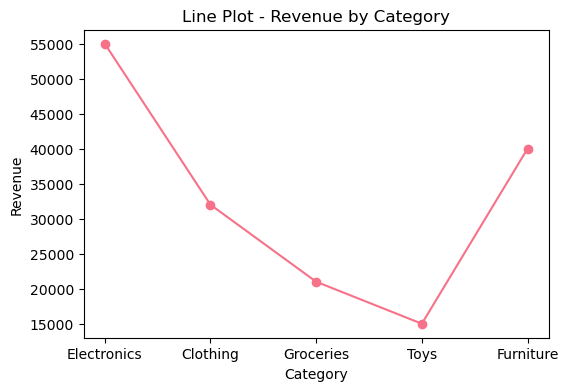

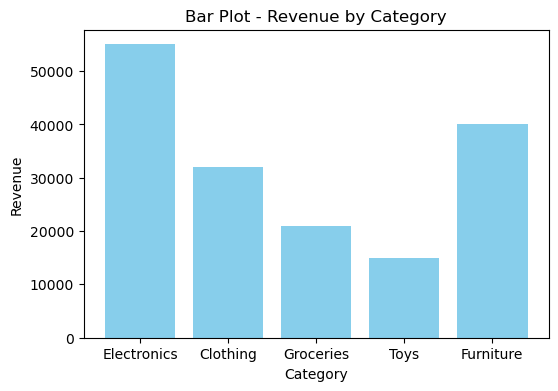

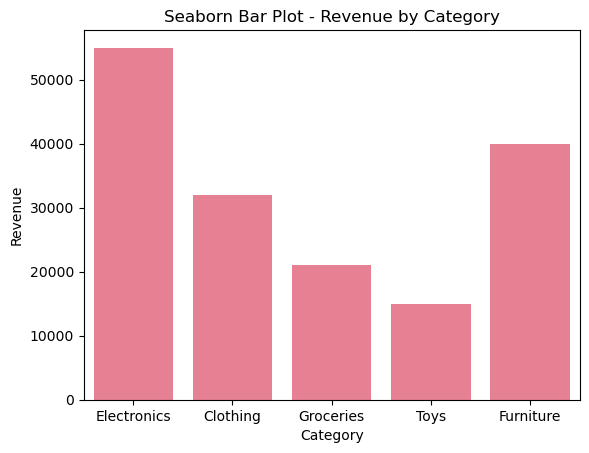

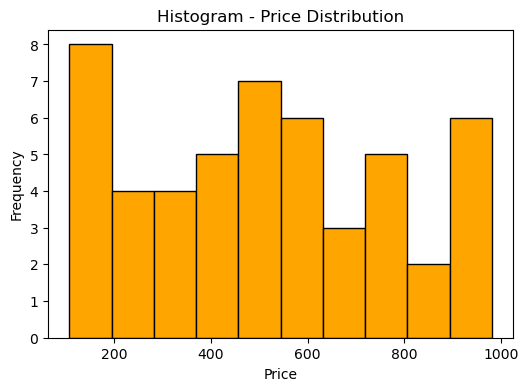

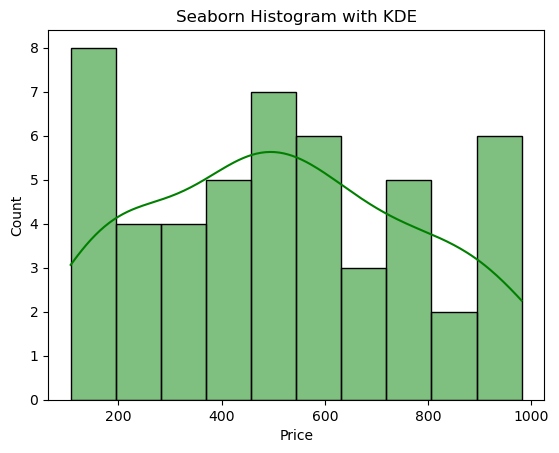

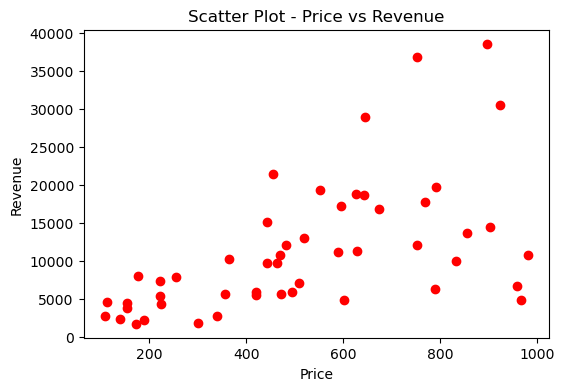

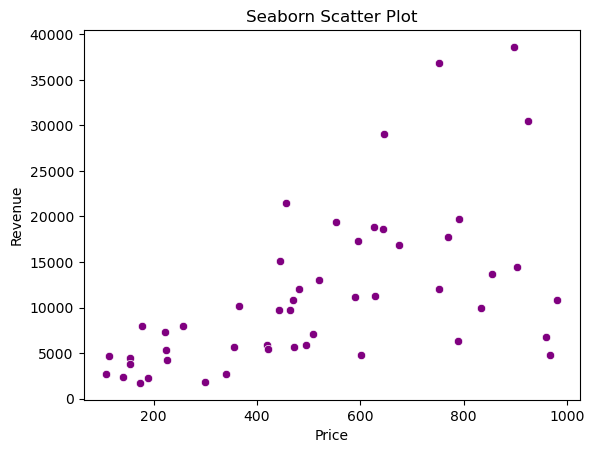

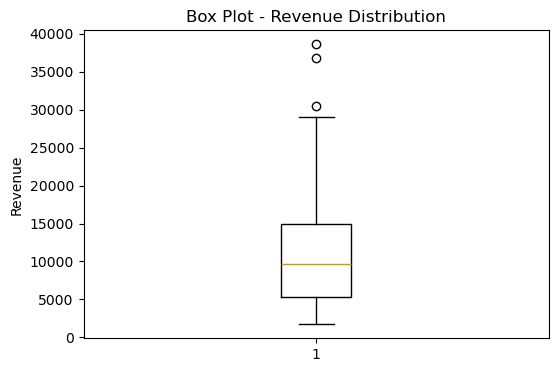

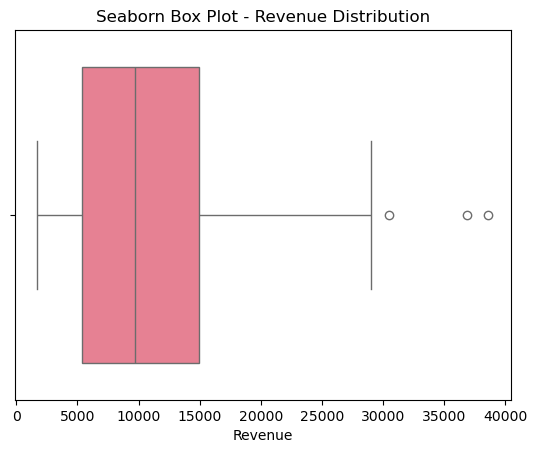

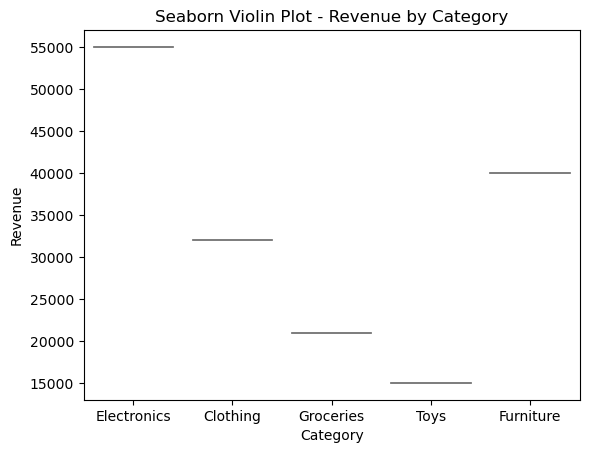

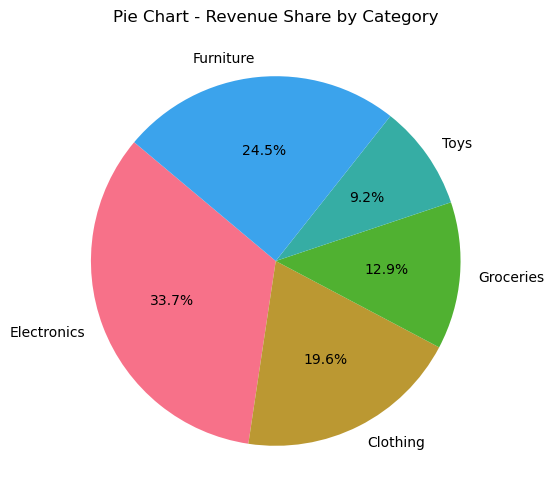

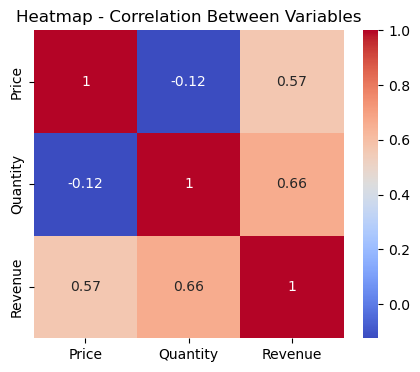

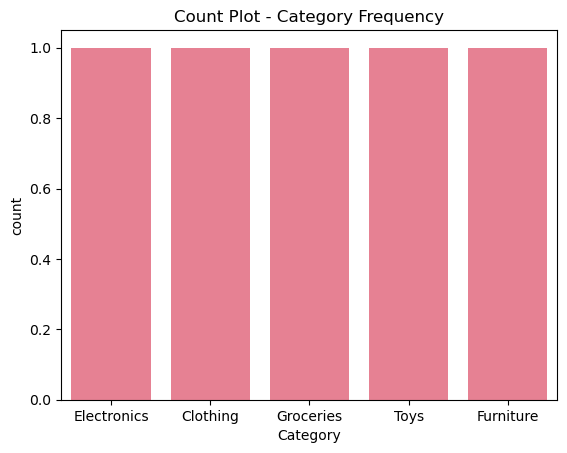

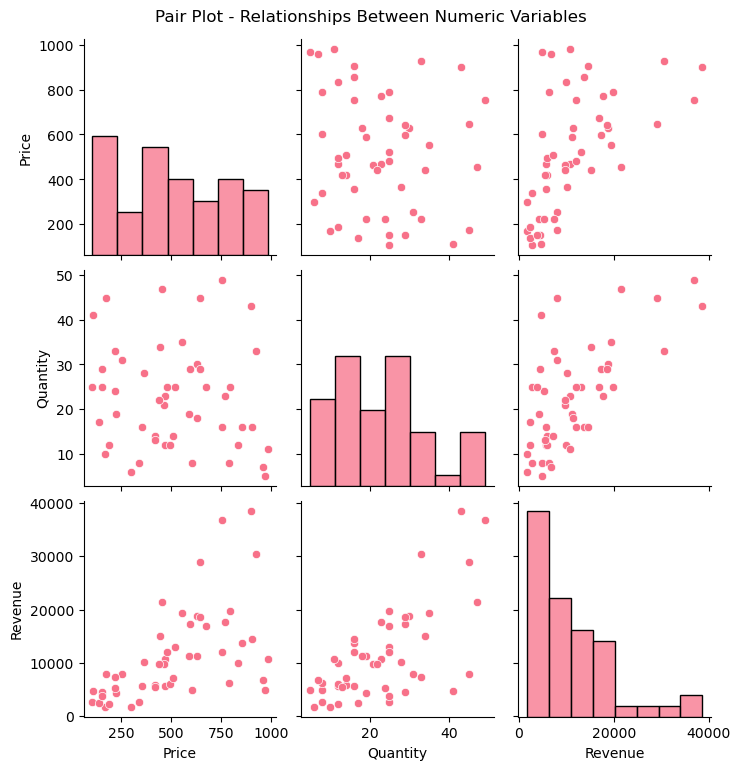

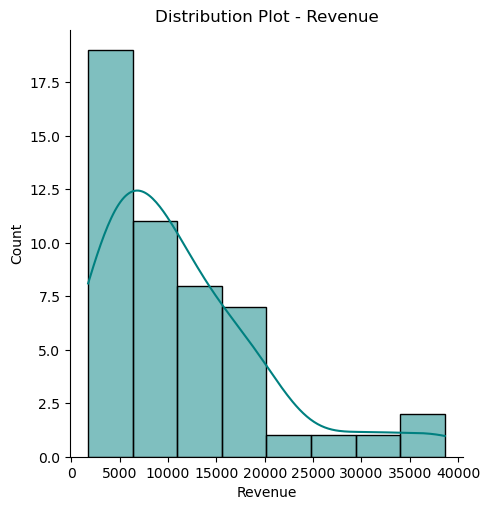

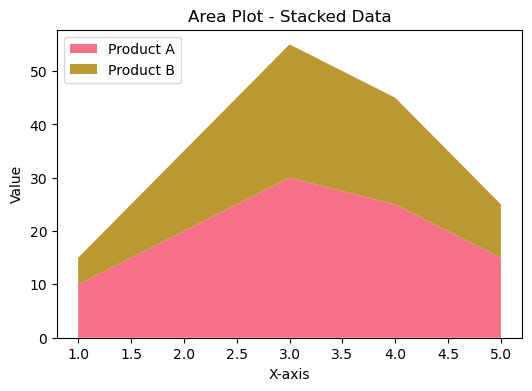

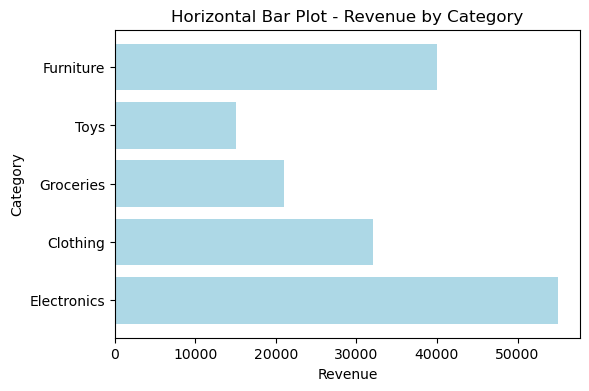

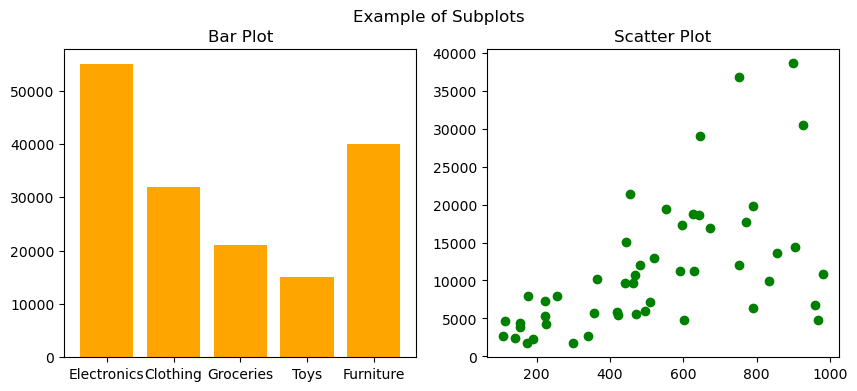

In [11]:
# ======================================================================
# Matplotlib and Seaborn Visualization Training Script
# ======================================================================

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ----------------------------------------------------------------------
# Create sample data for visualization
# ----------------------------------------------------------------------
data = {
    'Category': ['Electronics', 'Clothing', 'Groceries', 'Toys', 'Furniture'],
    'Revenue': [55000, 32000, 21000, 15000, 40000],
    'Profit': [12000, 7000, 5000, 2000, 9000],
    'Quantity': [120, 230, 300, 150, 180],
}
df = pd.DataFrame(data)

# Additional numeric data for correlation and distributions
np.random.seed(10)
df2 = pd.DataFrame({
    'Price': np.random.randint(100, 1000, 50),
    'Quantity': np.random.randint(1, 50, 50),
})
df2['Revenue'] = df2['Price'] * df2['Quantity']

# ======================================================================
# 1. LINE PLOT
# ======================================================================
# When to use: To visualize trend over time or continuous data.
# Why: Shows how values change sequentially.

plt.figure(figsize=(6,4))
plt.plot(df['Category'], df['Revenue'], marker='o')
plt.title("Line Plot - Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

# ======================================================================
# 2. BAR PLOT
# ======================================================================
# When to use: To compare values of different categories.
# Why: Best for categorical comparisons.

plt.figure(figsize=(6,4))
plt.bar(df['Category'], df['Revenue'], color='skyblue')
plt.title("Bar Plot - Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

# Seaborn version
sns.barplot(x='Category', y='Revenue', data=df)
plt.title("Seaborn Bar Plot - Revenue by Category")
plt.show()

# ======================================================================
# 3. HISTOGRAM
# ======================================================================
# When to use: To show frequency distribution of a single variable.
# Why: Helps visualize how data is spread.

plt.figure(figsize=(6,4))
plt.hist(df2['Price'], bins=10, color='orange', edgecolor='black')
plt.title("Histogram - Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Seaborn version
sns.histplot(df2['Price'], bins=10, kde=True, color='green')
plt.title("Seaborn Histogram with KDE")
plt.show()

# ======================================================================
# 4. SCATTER PLOT
# ======================================================================
# When to use: To find relationship between two numeric variables.
# Why: Identifies correlation and trends.

plt.figure(figsize=(6,4))
plt.scatter(df2['Price'], df2['Revenue'], color='red')
plt.title("Scatter Plot - Price vs Revenue")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.show()

# Seaborn version
sns.scatterplot(x='Price', y='Revenue', data=df2, color='purple')
plt.title("Seaborn Scatter Plot")
plt.show()

# ======================================================================
# 5. BOX PLOT
# ======================================================================
# When to use: To analyze distribution and detect outliers.
# Why: Shows median, quartiles, and outliers.

plt.figure(figsize=(6,4))
plt.boxplot(df2['Revenue'])
plt.title("Box Plot - Revenue Distribution")
plt.ylabel("Revenue")
plt.show()

# Seaborn version
sns.boxplot(x='Revenue', data=df2)
plt.title("Seaborn Box Plot - Revenue Distribution")
plt.show()

# ======================================================================
# 6. VIOLIN PLOT
# ======================================================================
# When to use: To show distribution and density across categories.
# Why: Combines boxplot and KDE.

sns.violinplot(x='Category', y='Revenue', data=df)
plt.title("Seaborn Violin Plot - Revenue by Category")
plt.show()

# ======================================================================
# 7. PIE CHART
# ======================================================================
# When to use: To show parts of a whole.
# Why: Useful for displaying percentage contribution.

plt.figure(figsize=(6,6))
plt.pie(df['Revenue'], labels=df['Category'], autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart - Revenue Share by Category")
plt.show()

# ======================================================================
# 8. HEATMAP
# ======================================================================
# When to use: To visualize correlation between numeric variables.
# Why: Shows relationship strength using color intensity.

corr = df2.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap - Correlation Between Variables")
plt.show()

# ======================================================================
# 9. COUNT PLOT
# ======================================================================
# When to use: To show frequency of categorical values.
# Why: Useful for counting category occurrences.

sns.countplot(x='Category', data=df)
plt.title("Count Plot - Category Frequency")
plt.show()

# ======================================================================
# 10. PAIR PLOT
# ======================================================================
# When to use: To analyze pairwise relationships between multiple variables.
# Why: Great for exploring data relationships quickly.

sns.pairplot(df2)
plt.suptitle("Pair Plot - Relationships Between Numeric Variables", y=1.02)
plt.show()

# ======================================================================
# 11. DISTRIBUTION PLOT
# ======================================================================
# When to use: To view probability distribution of a numeric variable.
# Why: Combines histogram and KDE.

sns.displot(df2['Revenue'], kde=True, color='teal')
plt.title("Distribution Plot - Revenue")
plt.show()

# ======================================================================
# 12. AREA PLOT
# ======================================================================
# When to use: To visualize cumulative or trend-based data.
# Why: Highlights total values over categories.

x = np.arange(1, 6)
y1 = np.array([10, 20, 30, 25, 15])
y2 = np.array([5, 15, 25, 20, 10])

plt.figure(figsize=(6,4))
plt.stackplot(x, y1, y2, labels=['Product A', 'Product B'])
plt.legend(loc='upper left')
plt.title("Area Plot - Stacked Data")
plt.xlabel("X-axis")
plt.ylabel("Value")
plt.show()

# ======================================================================
# 13. HORIZONTAL BAR PLOT
# ======================================================================
# When to use: When labels are long or readability is needed.
# Why: Easier to read long category names.

plt.figure(figsize=(6,4))
plt.barh(df['Category'], df['Revenue'], color='lightblue')
plt.title("Horizontal Bar Plot - Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

# ======================================================================
# 14. SUBPLOTS
# ======================================================================
# When to use: To show multiple graphs in one figure.
# Why: Useful for comparison between visualizations.

fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].bar(df['Category'], df['Revenue'], color='orange')
axes[0].set_title("Bar Plot")

axes[1].scatter(df2['Price'], df2['Revenue'], color='green')
axes[1].set_title("Scatter Plot")

plt.suptitle("Example of Subplots")
plt.show()

# ======================================================================
# END OF SCRIPT
# ======================================================================
